In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression





In [280]:
bike=pd.read_csv('day.csv') ## Reading the csv file

In [281]:
bike.head()  # Check the head of the dataset


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [282]:
bike.shape ## Checking the shape of the csv file

(730, 16)

In [283]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

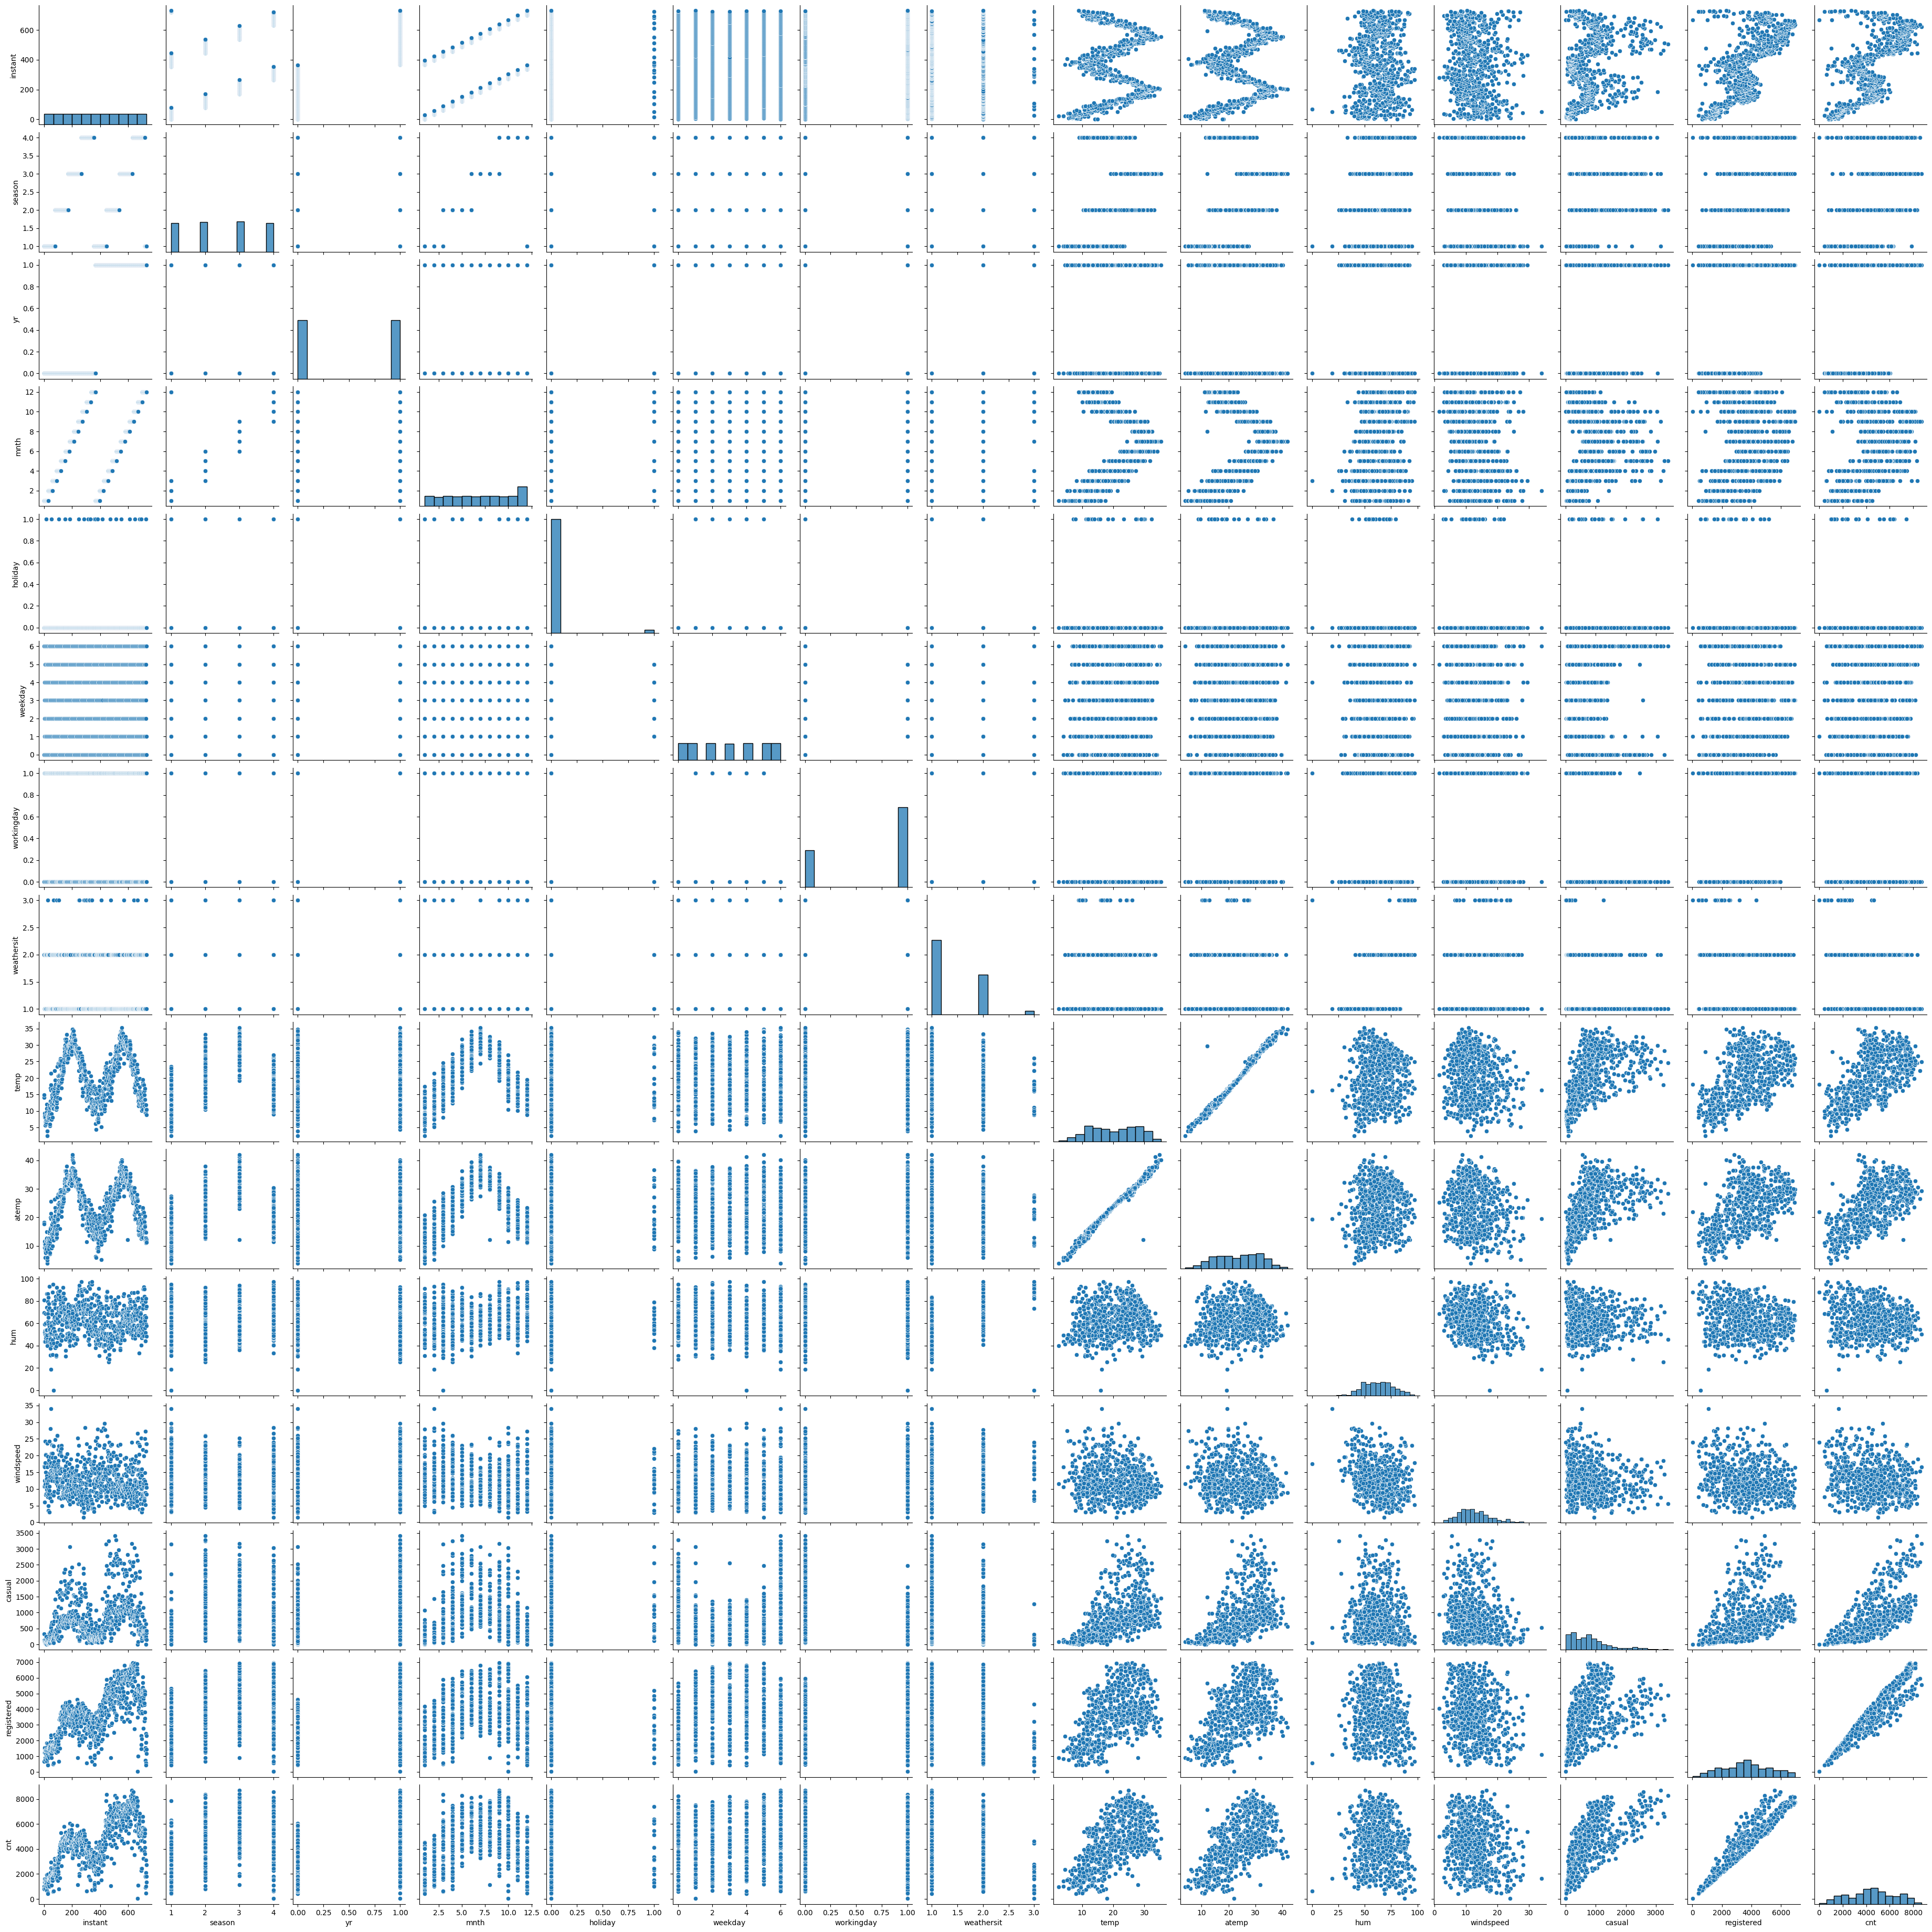

In [284]:
sns.pairplot(bike)
plt.show()



In [285]:
### Cleaning the data

# Handling Missing Values: Checking any missing values and decide on a strategy to handle them (e.g., drop or fill).
# Encoding Categorical Variables: Convert categorical variables into numerical format 
# Normalizing Numerical Features: Scale the numerical features if they have different ranges.


In [286]:
bike.info() ## to check if it has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [287]:
bike.isnull().sum() ## Checking if it has any null values and doesn't shows like that

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

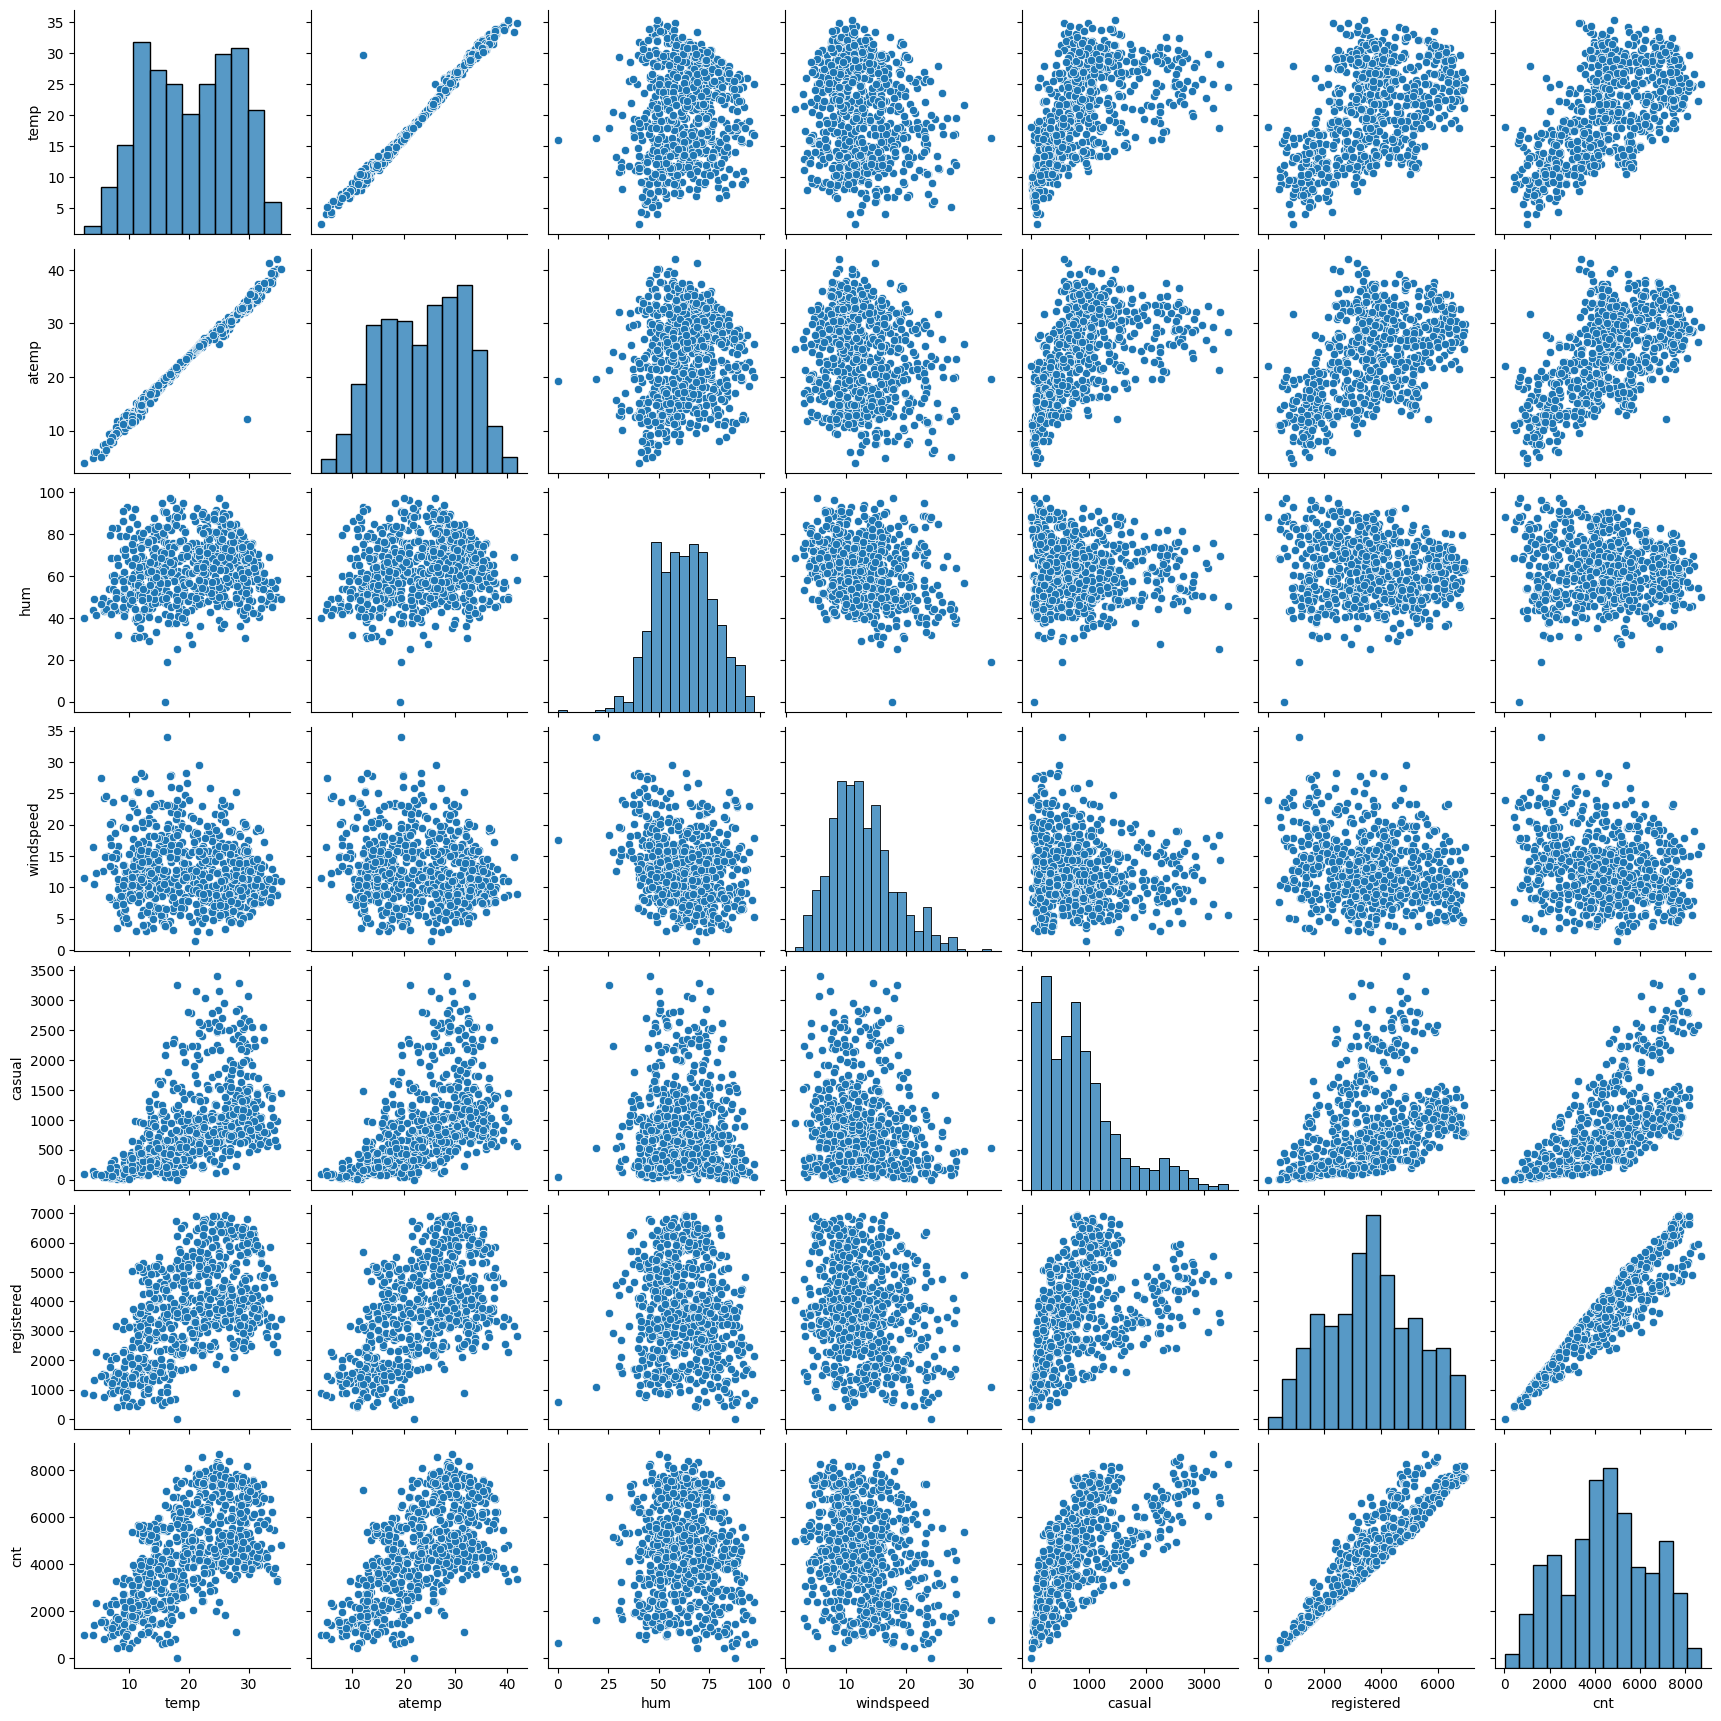

In [288]:
#Visualising numeric variables 

sns.pairplot(bike[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()


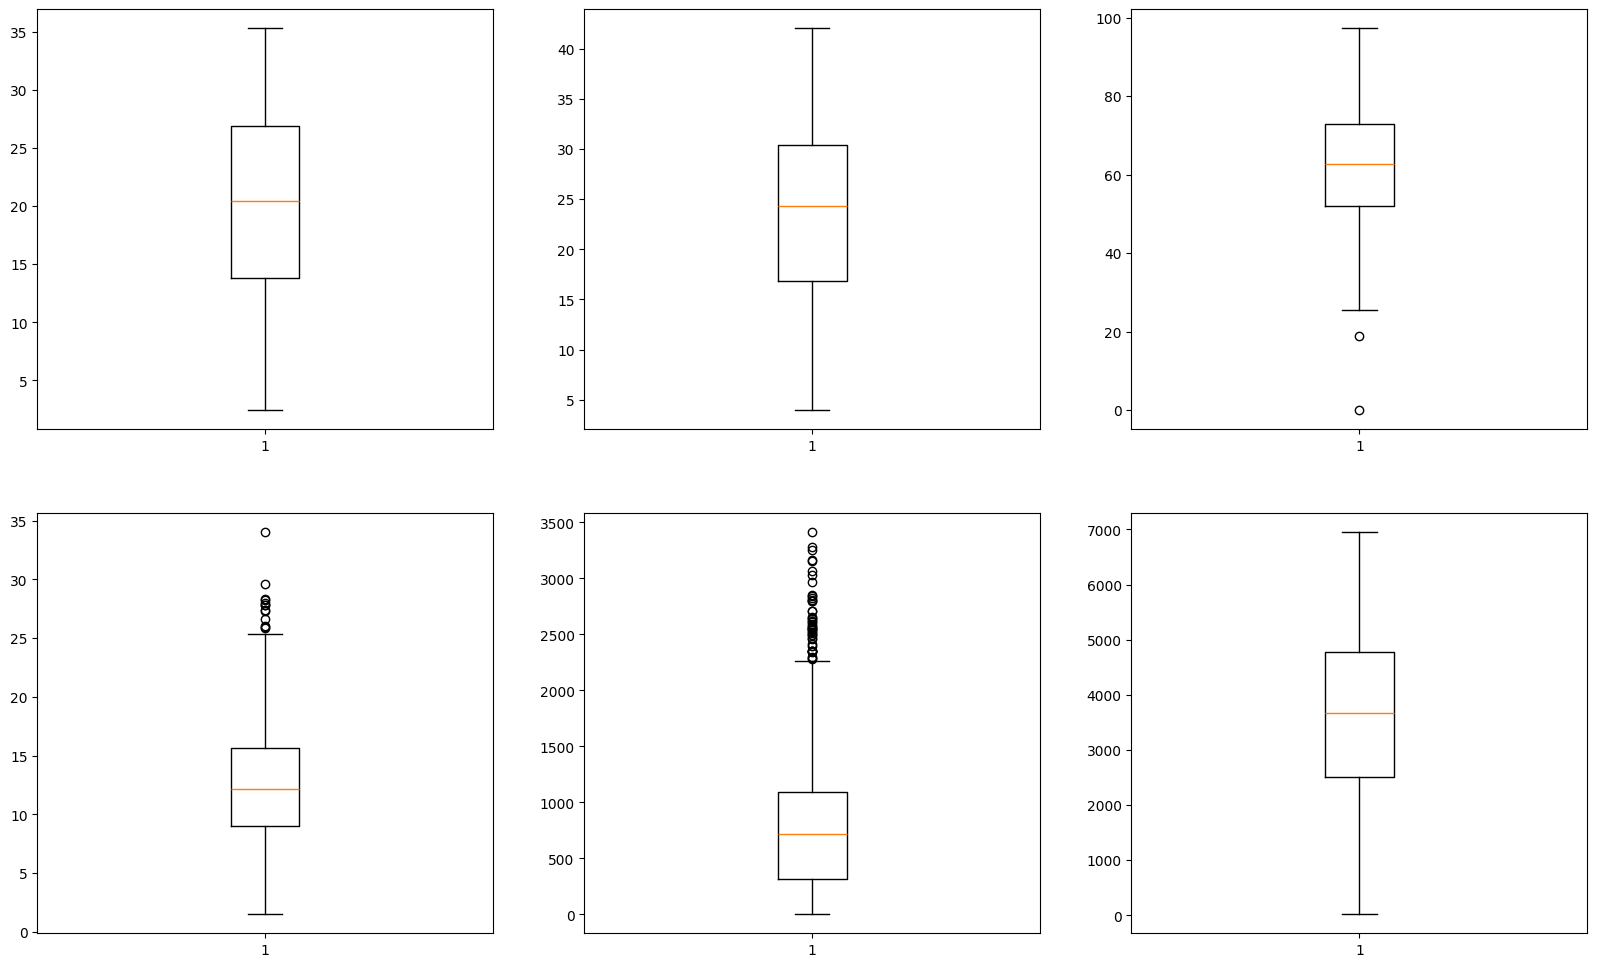

In [289]:
#Visualising continuous Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.boxplot(bike["temp"])
plt.subplot(2,3,2)
plt.boxplot(bike["atemp"])
plt.subplot(2,3,3)
plt.boxplot(bike["hum"])
plt.subplot(2,3,4)
plt.boxplot(bike["windspeed"])
plt.subplot(2,3,5)
plt.boxplot(bike["casual"])
plt.subplot(2,3,6)
plt.boxplot(bike["registered"])
plt.show()

In [290]:
bike.columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


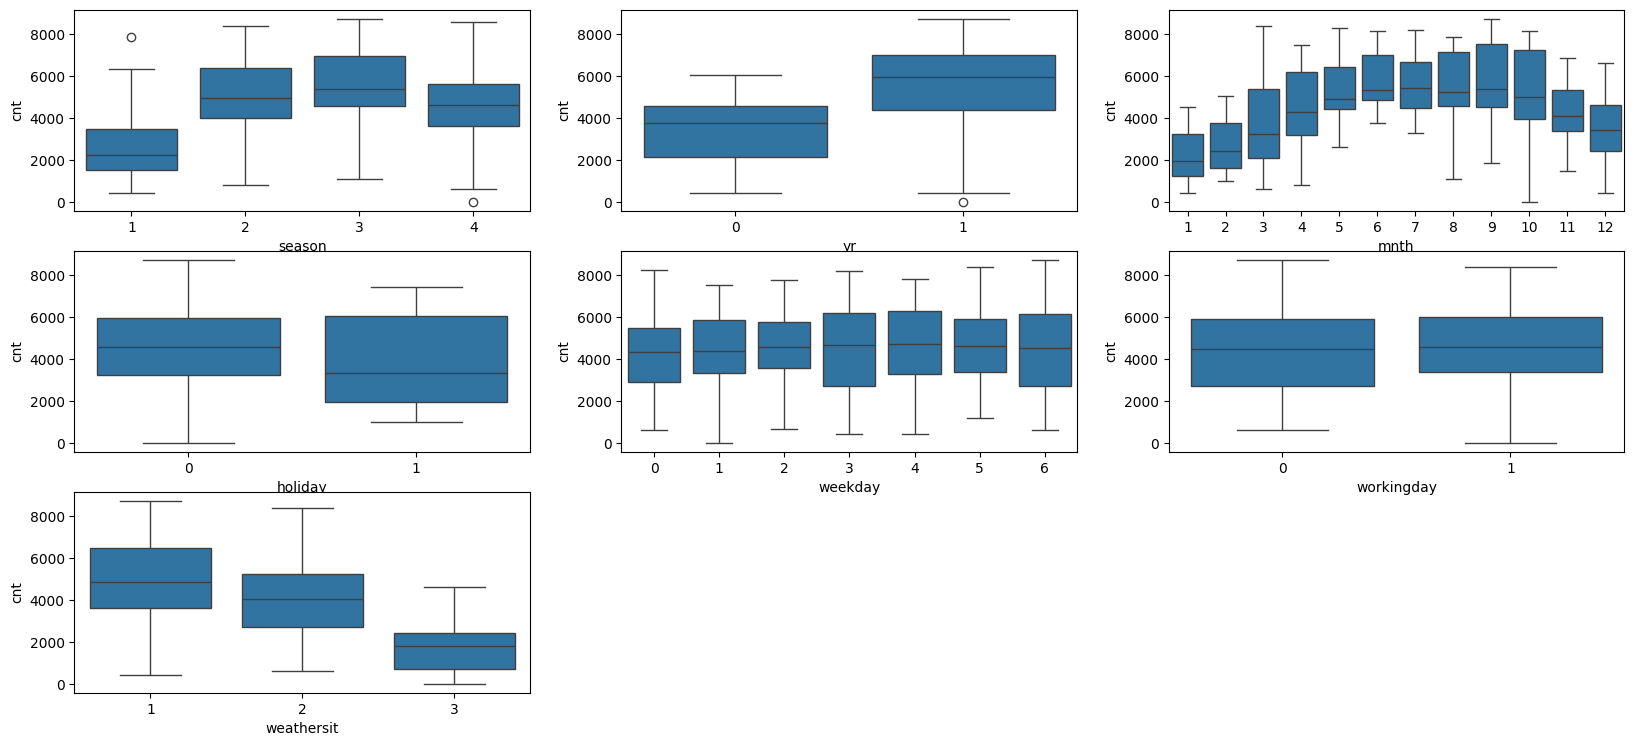

In [291]:
#Visualising Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(4,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(4,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

In [292]:
## Data cleaning and Data Preparation

# Not needed are 
#    	- 'instant': record index, doesnt add any value
#       - 'dteday' :  we have month and year
#       - 'casual': count of casual users, not sure if we can predict this 
#       - 'registered': count of registered users, not sure if we can predict this 
#       - 'temp:  as it has other alternative as atemp
bike.drop(columns=["instant","dteday","casual","registered"], axis=1,inplace=True)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [293]:
## now we can check to see if we can convert into dummy variables especially for
#    - season as it has 1 to 4, may be we can give 4 season names to it like spring(which can be dummy), summer, fall, winter
#    - weathersit - 1 for clear(dummy), 2 for mist 3 for slowrain, and 4 to heavy rain

In [294]:
season_type = pd.get_dummies(bike['season'], drop_first = True, dtype=int)
season_type.rename(columns={2:"summer", 3:"fall", 4:"winter"},inplace=True)
season_type.head()


summer  fall  winter
0       0     0       0
1       0     0       0
2       0     0       0
3       0     0       0
4       0     0       0

In [295]:
weather_type = pd.get_dummies(bike['weathersit'], drop_first = True,dtype=int)
weather_type.rename(columns={2:"mist", 3:"slowrain"},inplace=True)
weather_type.head()

mist  slowrain
0     1         0
1     1         0
2     0         0
3     0         0
4     0         0

In [296]:
#Concatenating new dummy variables  and Dropping columns season & weathersit 

bike = pd.concat([bike, season_type, weather_type], axis = 1)

bike.drop(columns=["season", "weathersit"],axis=1,inplace =True)

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    int64  
 11  fall        730 non-null    int64  
 12  winter      730 non-null    int64  
 13  mist        730 non-null    int64  
 14  slowrain    730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


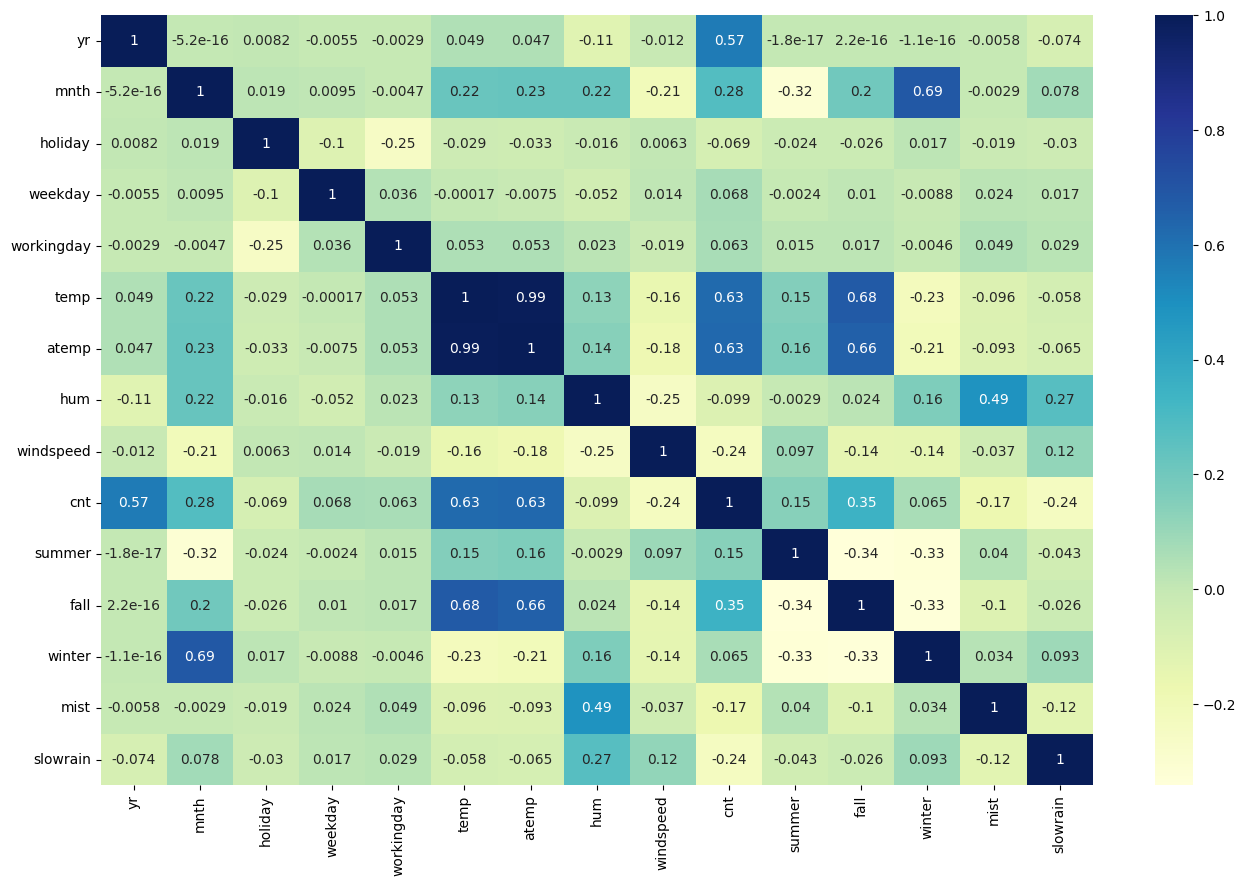

In [297]:

plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [298]:
# Splitting the Data into Training and Testing Sets

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)


In [299]:
#Rescaling the Features
scaler = MinMaxScaler()
num_vars = ['atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

# Analysing the train dataframe after scaling
bike_train.head()

yr  mnth  holiday  weekday  workingday       temp     atemp       hum  \
653   1    10        0        2           1  19.201653  0.501133  0.575354   
576   1     7        0        2           1  29.246653  0.766351  0.725633   
426   1     3        0        6           0  16.980847  0.438975  0.640189   
728   1    12        0        0           0  10.489153  0.200348  0.498067   
482   1     4        0        6           0  15.443347  0.391735  0.504508   

     windspeed       cnt  summer  fall  winter  mist  slowrain  
653   0.300794  0.864243       0     0       1     0         0  
576   0.264686  0.827658       0     1       0     0         0  
426   0.255342  0.465255       0     0       0     1         0  
728   0.663106  0.204096       0     0       0     0         0  
482   0.188475  0.482973       1     0       0     1         0

In [300]:
bike_train.describe()


yr        mnth     holiday     weekday  workingday        temp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    6.549020    0.025490    2.990196    0.676471   20.102429   
std      0.500429    3.468714    0.157763    2.017093    0.468282    7.431169   
min      0.000000    1.000000    0.000000    0.000000    0.000000    2.424346   
25%      0.000000    3.000000    0.000000    1.000000    0.000000   13.606865   
50%      1.000000    7.000000    0.000000    3.000000    1.000000   20.209597   
75%      1.000000   10.000000    0.000000    5.000000    1.000000   26.615847   
max      1.000000   12.000000    1.000000    6.000000    1.000000   35.328347   

            atemp         hum   windspeed         cnt      summer        fall  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.512989    0.650369    0.320768    0.513620    0.245098    0.262745   
std      0.212385    0.145882    0.169797    0.224593    0.430568    0.440557   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.332086    0.538643    0.199179    0.356420    0.000000    0.000000   
50%      0.526811    0.653714    0.296763    0.518638    0.000000    0.000000   
75%      0.688457    0.754830    0.414447    0.684710    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          winter        mist    slowrain  
count  510.00000  510.000000  510.000000  
mean     0.24902    0.343137    0.029412  
std      0.43287    0.475223    0.169124  
min      0.00000    0.000000    0.000000  
25%      0.00000    0.000000    0.000000  
50%      0.00000    0.000000    0.000000  
75%      0.00000    1.000000    0.000000  
max      1.00000    1.000000    1.000000

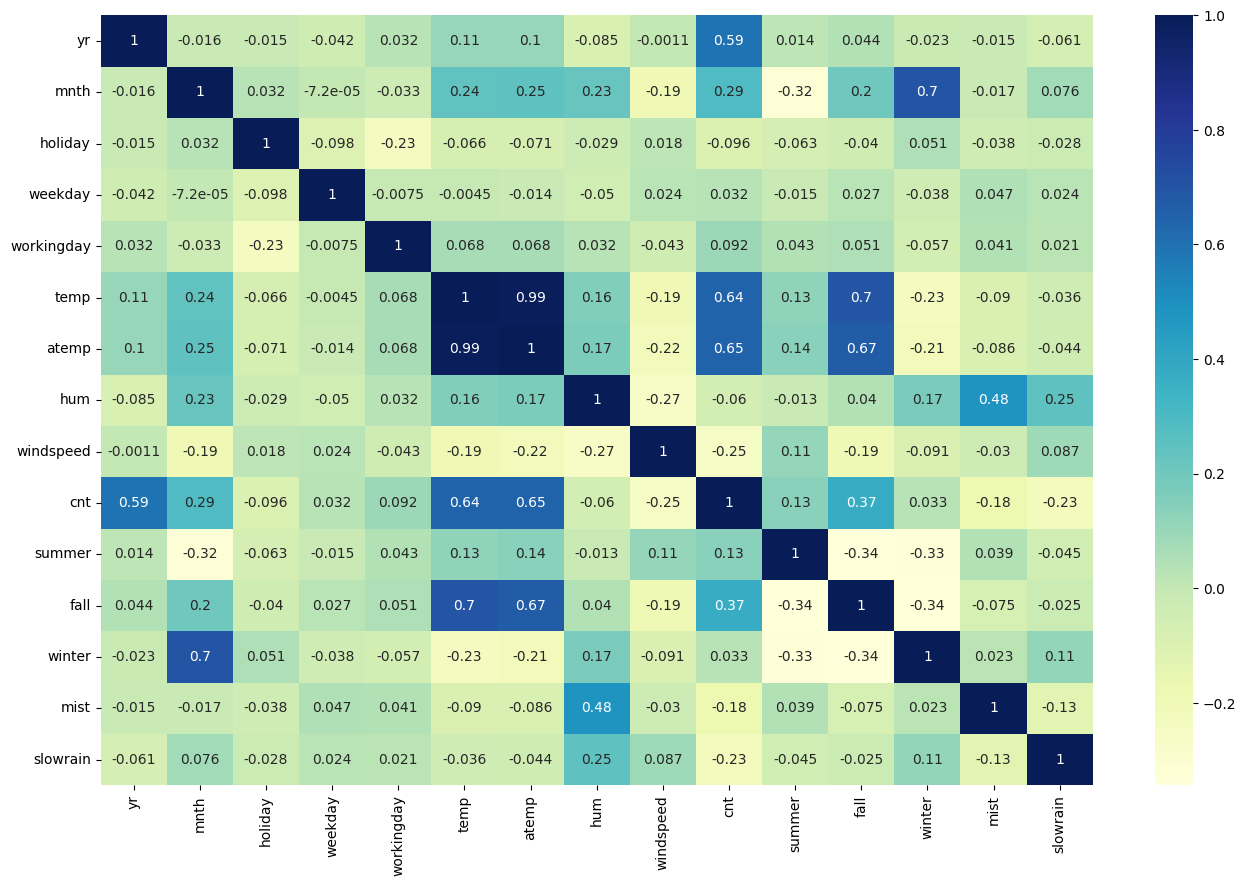

In [301]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

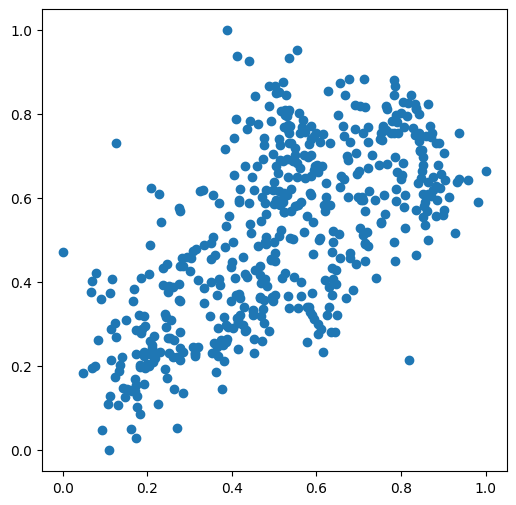

In [302]:
plt.figure(figsize=[6,6])
plt.scatter(bike_train.cnt, bike_train.atemp)
plt.show()

In [303]:
y_train = bike_train.pop('cnt')
X_train = bike_train

print (y_train.head())
print (X_train.head())


653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64
     yr  mnth  holiday  weekday  workingday       temp     atemp       hum  \
653   1    10        0        2           1  19.201653  0.501133  0.575354   
576   1     7        0        2           1  29.246653  0.766351  0.725633   
426   1     3        0        6           0  16.980847  0.438975  0.640189   
728   1    12        0        0           0  10.489153  0.200348  0.498067   
482   1     4        0        6           0  15.443347  0.391735  0.504508   

     windspeed  summer  fall  winter  mist  slowrain  
653   0.300794       0     0       1     0         0  
576   0.264686       0     1       0     0         0  
426   0.255342       0     0       0     1         0  
728   0.663106       0     0       0     0         0  
482   0.188475       1     0       0     1         0  


In [304]:
#Building the Linear Model

# Running RFE with the output number of the variable equal to 10

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm,12)             # running RFE
rfe = RFE(estimator=lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [305]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('mist', True, 1),
 ('slowrain', True, 1)]

In [306]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'mist', 'slowrain'],
      dtype='object')

In [307]:
X_train.columns[~rfe.support_]


Index(['mnth', 'weekday'], dtype='object')

In [308]:
# Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model



In [309]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.86e-181
Time:                        22:53:42   Log-Likelihood:                 488.03
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1711      0.030      5.636      0.0

In [310]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)


In [311]:
# Rebuilding the model without holiday


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.92e-181
Time:                        22:53:42   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     498   BIC:                            -893.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1653      0.030      5.424      0.0

In [312]:
## it didn't improve much 
X_train_new.columns


Index(['const', 'yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'mist', 'slowrain'],
      dtype='object')

In [313]:
X_train_new = X_train_new.drop(['const'], axis=1)


In [314]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2         temp  428.69
3        atemp  336.41
4          hum   18.92
7         fall    6.44
5    windspeed    4.39
6       summer    3.34
1   workingday    3.01
8       winter    2.50
9         mist    2.16
0           yr    2.05
10    slowrain    1.18

In [315]:
#Residual Analysis of the train data


In [316]:
y_train_cnt = lm.predict(X_train_lm)


In [317]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/75/fqk3nxnn5jj6rbybzmt4yr1r0000gp/T/ipykernel_74163/1378128665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

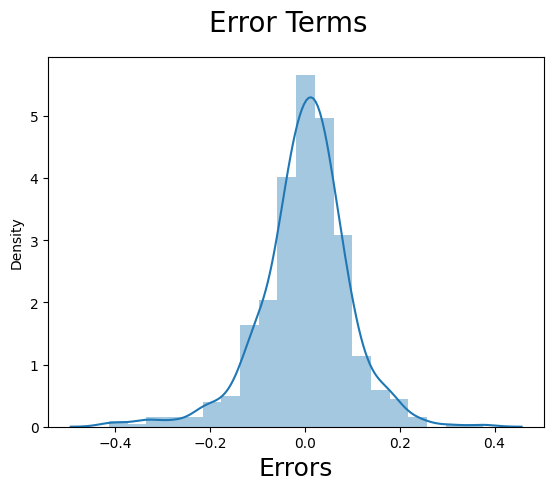

In [318]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [320]:
#Making Predictions

num_vars = ['atemp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
y_test = bike_test.pop('cnt')
X_test = bike_test

In [321]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [322]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

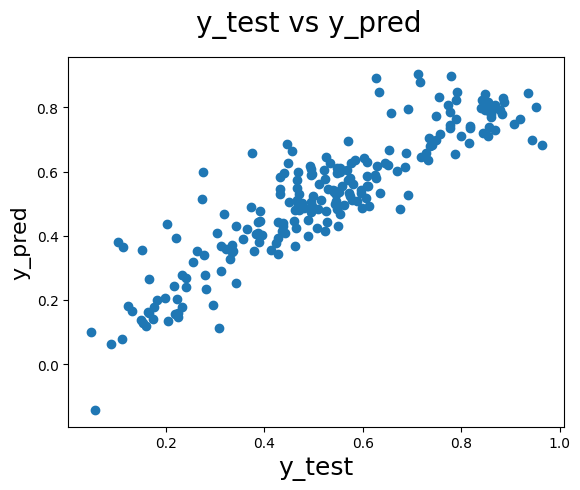

In [323]:
# Model Evaluation

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label